In [1]:
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 11.1 그래이던트 소실과 폭주
- activation function으로 sigmoid를 사용하는 것과 정규분포로 weight를 초기화 하면 출력의 분산이 커짐
- sigmoid의 양끝에선 그래디언트가 매우 작다

## 11.1 글로럿과 He 초기화

In [2]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [3]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal") # he 정규분포로 초기화

In [4]:
init = keras.initializers.VarianceScaling(scale=2., mode="fan_avg", distribution="uniform") # 균등분포 초기화
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

## 11.1.2 수렴하지 않는 활성화함수
- forward passing할때 activation function을 잘 선택해야한다.

In [5]:
# activation function 종류
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

그림 저장: elu_plot


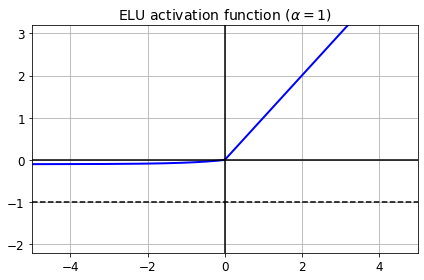

In [6]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)
z = np.linspace(-5, 5, 200)
    
plt.plot(z, elu(z,alpha=0.1), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("elu_plot")
plt.show()

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

### LeakyReLU

In [8]:

tf.random.set_seed(42)
np.random.seed(42)


model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(10, activation="softmax")
])

In [9]:

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [10]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 1.2929 - accuracy: 0.6222 - val_loss: 0.8954 - val_accuracy: 0.7152
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.8001 - accuracy: 0.7362 - val_loss: 0.7162 - val_accuracy: 0.7638
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6843 - accuracy: 0.7718 - val_loss: 0.6450 - val_accuracy: 0.7890
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6237 - accuracy: 0.7944 - val_loss: 0.5915 - val_accuracy: 0.8056
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5845 - accuracy: 0.8074 - val_loss: 0.5592 - val_accuracy: 0.8194
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5563 - accuracy: 0.8156 - val_loss: 0.5358 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5346 - accuracy: 0.8223 - val_loss: 0.5163 - val_accuracy:

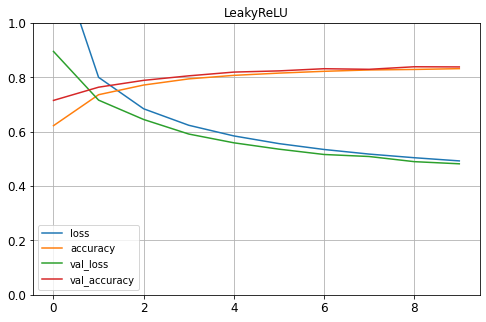

In [11]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title("LeakyReLU")
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### PReLU

In [12]:


model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))



Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.3337 - accuracy: 0.6140 - val_loss: 0.8951 - val_accuracy: 0.7192
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8048 - accuracy: 0.7413 - val_loss: 0.7103 - val_accuracy: 0.7744
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6849 - accuracy: 0.7771 - val_loss: 0.6404 - val_accuracy: 0.7962
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6237 - accuracy: 0.7942 - val_loss: 0.5859 - val_accuracy: 0.8122
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5846 - accuracy: 0.8072 - val_loss: 0.5542 - val_accuracy: 0.8192
Epoch 6/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.5567 - accuracy: 0.8147 - val_loss: 0.5315 - val_accuracy: 0.8246
Epoch 7/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.5352 - accuracy: 0.8205 - val_loss: 0.5121 - val_accuracy:

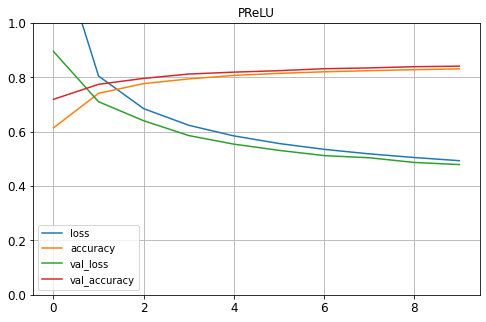

In [13]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title("PReLU")
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### SELU

In [14]:

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))


model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [15]:
# input normalize
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds 
X_valid_scaled = (X_valid - pixel_means) / pixel_stds # 근데 validation set과 test set모두 X_train의 평균과 표준편차로 정규화해도 되는건가
X_test_scaled = (X_test-pixel_means) / pixel_stds

In [16]:

history = model.fit(X_train_scaled, y_train, epochs=10,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 1.4654 - accuracy: 0.4345 - val_loss: 1.0374 - val_accuracy: 0.5938
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.8108 - accuracy: 0.7059 - val_loss: 0.7174 - val_accuracy: 0.7474
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7209 - accuracy: 0.7423 - val_loss: 0.8567 - val_accuracy: 0.6796
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6358 - accuracy: 0.7788 - val_loss: 0.5870 - val_accuracy: 0.7924
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5823 - accuracy: 0.7967 - val_loss: 0.5437 - val_accuracy: 0.8138
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5926 - accuracy: 0.7924 - val_loss: 0.5463 - val_accuracy: 0.8180
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5061 - accuracy: 0.8230 - val_loss: 0.4699 - val_ac

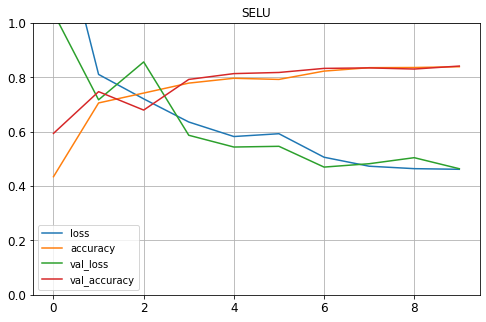

In [17]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title("SELU")
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### ReLU

In [18]:

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])


history = model.fit(X_train_scaled, y_train, epochs=10,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 10s 6ms/step - loss: 1.9285 - accuracy: 0.2072 - val_loss: 1.6136 - val_accuracy: 0.3976
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 1.5691 - accuracy: 0.3781 - val_loss: 1.1609 - val_accuracy: 0.4910
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 1.1585 - accuracy: 0.5257 - val_loss: 0.9940 - val_accuracy: 0.6070
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.9479 - accuracy: 0.6237 - val_loss: 0.9262 - val_accuracy: 0.5986
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.8512 - accuracy: 0.6907 - val_loss: 0.7578 - val_accuracy: 0.7310
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.8770 - accuracy: 0.6828 - val_loss: 0.7457 - val_accuracy: 0.7462
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.8809 - accuracy: 0.6729 - val_loss: 0.8518 - val_ac

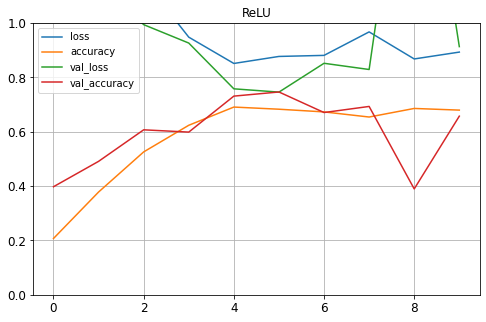

In [19]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title("ReLU")
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## 11.1.3 배치 정규화
- keras.layers.BatchNormalization()로 정규화 쉽게 가능

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_210 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_211 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_212 (Dense)            (None, 10)               

In [21]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [22]:
bn1.updates


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


[]

## 11.1.4 그래디언트 클리핑

In [23]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)
optimizer = keras.optimizers.SGD(clipnorm=1.0)

# 11.2 사전훈련된 층 재사용하기(전이 학습)
- 비슷한 유형의 문제를 처리한 신경망의 하위층을 재사용하자
- 원래 문제의 데이터와 크기가 다른 데이터를 입력으로 준다면 그 데이터의 크기변경을 전처리해야함

## 11.2.1 케라스 모델 재사용

In [24]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A), # not sandals and not shirts 0,1,2,3,4,7,8,9
            (X[y_5_or_6], y_B)) # sandals or shirts 5,6

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [25]:
tf.random.set_seed(42)
np.random.seed(42)

In [26]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28,28]))
for n_hidden in (300,100,50,50,50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))

model_A.add(keras.layers.Dense(8, activation="softmax"))


In [27]:
model_A.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

In [28]:
historyA = model_A.fit(X_train_A, y_train_A, epochs=20, validation_data=(X_valid_A,y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.5927 - accuracy: 0.8103 - val_loss: 0.3894 - val_accuracy: 0.8662
Epoch 2/20
1375/1375 [==============================] - 2s 1ms/step - loss: 0.3523 - accuracy: 0.8786 - val_loss: 0.3288 - val_accuracy: 0.8827
Epoch 3/20
1375/1375 [==============================] - 2s 1ms/step - loss: 0.3170 - accuracy: 0.8894 - val_loss: 0.3011 - val_accuracy: 0.8994
Epoch 4/20
1375/1375 [==============================] - 2s 1ms/step - loss: 0.2973 - accuracy: 0.8974 - val_loss: 0.2892 - val_accuracy: 0.9021
Epoch 5/20
1375/1375 [==============================] - 2s 1ms/step - loss: 0.2835 - accuracy: 0.9020 - val_loss: 0.2772 - val_accuracy: 0.9061
Epoch 6/20
1375/1375 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.9061 - val_loss: 0.2733 - val_accuracy: 0.9063
Epoch 7/20
1375/1375 [==============================] - 2s 1ms/step - loss: 0.2642 - accuracy: 0.9091 - val_loss: 0.2719 - val_accuracy:

In [29]:
model_A.save("my_model_A.h5")

In [30]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [31]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [32]:
historyB = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 0s 22ms/step - loss: 0.9573 - accuracy: 0.4650 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 8ms/step - loss: 0.5692 - accuracy: 0.7450 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 8ms/step - loss: 0.4503 - accuracy: 0.8650 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 8ms/step - loss: 0.3879 - accuracy: 0.8950 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 9ms/step - loss: 0.3435 - accuracy: 0.9250 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 8ms/step - loss: 0.3081 - accuracy: 0.9300 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 8ms/step - loss: 0.2800 - accuracy: 0.9350 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [=================

In [33]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_210 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_211 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_212 (Dense)            (None, 10)               

### 전이학습

In [34]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1,activation="sigmoid")) # 훈련시키면 model_A도 영향받는다.
model_A.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_213 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_214 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_215 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_216 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_217 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_218 (Dense)            (None, 8)                

In [35]:
# model_A가 영향받는걸 없애려면 clone_model()로 클론. 단, model_A의 가중치를 복사해야함
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.summary()
model_A_clone.set_weights(model_A.get_weights())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_213 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_214 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_215 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_216 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_217 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_218 (Dense)            (None, 8)                

In [36]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True
model_B_on_A.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

In [37]:
historyB_on_A = model_B_on_A.fit(X_train_B, y_train_B,epochs=16, validation_data=(X_valid_B,y_valid_B))

Epoch 1/16
7/7 [==============================] - 0s 22ms/step - loss: 0.5019 - accuracy: 0.7450 - val_loss: 0.4191 - val_accuracy: 0.7992
Epoch 2/16
7/7 [==============================] - 0s 8ms/step - loss: 0.3395 - accuracy: 0.8650 - val_loss: 0.3027 - val_accuracy: 0.8915
Epoch 3/16
7/7 [==============================] - 0s 8ms/step - loss: 0.2430 - accuracy: 0.9500 - val_loss: 0.2392 - val_accuracy: 0.9402
Epoch 4/16
7/7 [==============================] - 0s 8ms/step - loss: 0.1901 - accuracy: 0.9600 - val_loss: 0.1990 - val_accuracy: 0.9584
Epoch 5/16
7/7 [==============================] - 0s 8ms/step - loss: 0.1561 - accuracy: 0.9800 - val_loss: 0.1711 - val_accuracy: 0.9706
Epoch 6/16
7/7 [==============================] - 0s 8ms/step - loss: 0.1319 - accuracy: 0.9900 - val_loss: 0.1512 - val_accuracy: 0.9757
Epoch 7/16
7/7 [==============================] - 0s 9ms/step - loss: 0.1147 - accuracy: 0.9950 - val_loss: 0.1363 - val_accuracy: 0.9817
Epoch 8/16
7/7 [=================

In [38]:
model_B.evaluate(X_test_B,y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.1408 - accuracy: 0.9705


[0.1408407837152481, 0.9704999923706055]

In [39]:
model_B_on_A.evaluate(X_test_B,y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.0710 - accuracy: 0.9925


[0.07101605832576752, 0.9925000071525574]

In [40]:
(100 - 96.95) / (100 - 99.25)

4.066666666666663

# 11.3 고속 옵티마이저 

## 11.3.1 모멘텀 최적화
- 모멘텀 최적화는 경사하강법보다 더 빠르게 평평한 지역을 탈출하게 도와준다
- 스케일차이가 심하게 나는 입력을 받게 되면 좁고 긴 골짜기를 형성하는데, 모멘텀 최적화를 사용하면 빠르게 최적점에 도달할 수 있다

In [41]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.8)

## 11.3.2 네스테로프 가속경사
- 모멘텀 최적화의 변종으로 모멘텀보다 거의 항상 더 빠름

In [42]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)

## 11.3.6 학습률 스케줄링
- 좋은 학습률을 찾기 위해서 훈련하는 동안 학습률을 감소시키는 전략

In [43]:
# 거듭제곱 스케줄링
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)


model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [44]:
n_epochs=25
history = model.fit(X_train_scaled, y_train,epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Epoch 1/25


ValueError: in user code:

    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:187 __call__
        self.build(y_pred)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:140 build
        self._losses = nest.map_structure(self._get_loss_object, self._losses)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\nest.py:635 map_structure
        structure[0], [func(*x) for x in entries],
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\nest.py:635 <listcomp>
        structure[0], [func(*x) for x in entries],
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:263 _get_loss_object
        loss = losses_mod.get(loss)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1895 get
        return deserialize(identifier)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1850 deserialize
        return deserialize_keras_object(
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:377 deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: sparse_categorical_corssentropy
